
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# TP2
#### Israel Pavelek

## Ejercicio 1
El siguiente filtro pasabajos debe presentar una respuesta Butterworth con un ancho de banda de -3dB a 1KHz. Determinar el valor de L y C sabiendo que la carga es de 1 KΩ.
Verificar las especificaciones del filtro mediante el uso de simuladores. 
Sugerencia: diseñar el filtro con valores normalizados en
frecuencia e impedancia y luego desnormalizar para calcular el valor del filtro pedido

<img src="./Ej1.png" align="center" width="400" /> 


$$   \frac{Vo}{Vi}=\frac{\frac{\frac{R}{SC}}{R+\frac{1}{SC}}}{SL+\frac{\frac{R}{SC}}{R+\frac{1}{SC}}} $$
$$ \frac{Vo}{Vi}=\frac{\frac{R}{SL}}{SLR+\frac{\cancel{S}L}{\cancel{S}C}+\frac{R}{SC}} $$
$$ \frac{Vo}{Vi}=\frac{\frac{\cancel{R}}{\color{RED}{L\cancel{R}C}}}{\frac{S^2LRC+SL+R}{\color{RED}{LRC}}} $$
$$\\ \frac{Vo}{Vi}=\frac{\frac{1}{LC}}{S^2+\frac{S}{RC}+\frac{1}{LC}} \\ $$
$$\\ \frac{Vo}{Vi}=\frac{\omega_0^2}{S^2+\frac{\omega_0}{Q} \cdot S + \omega_0^2} \\ $$

Como es Butterworth Nomralizado:

$$ \frac{Vo}{Vi}=\frac{1}{S^2+\sqrt{2}S+1}  \Longrightarrow \frac{Vo}{Vi}=\frac{\frac{1}{LC}}{S^2+\frac{S}{RC}+\frac{1}{LC}} $$

$ \sqrt{2}=\frac{1}{RC} $
si R=1Ω   $ \Longrightarrow $  $ C=\frac{1}{\sqrt{2}=0,707 F} $
$ 1=\frac{1}{LC}   \Longrightarrow L=\frac{1}{C}=\sqrt{2}C=1,41 Hy $

Desnormalizando RN=1KΩ $\omega_0=2\pi1KHz$

R'=1KΩ 
$\\ C'=\frac{0,707}{2\pi1KHz \cdot 1KΩ}=112,52 nf \\ $
$\\ L'=\frac{1,41 Hy}{2\pi1KHz} \cdot 1KΩ = 0,22Hy \\ $

<img src="./ej1cir.png" align="center" width="400" /> 

Simulacion:

<img src="./Ej1simu.png" align="center" width="400" /> 





## Ejercicio 2

Se desea diseñar un filtro pasabajos con las siguientes características. 
<br>&nbsp;
● Máxima planicidad en la banda de paso
<br>&nbsp;
● Máxima atenuación: 0.02 dB para 0 < ⍵ < 1
<br>&nbsp;
● Mínima atenuación para ⍵ > 2.2: 48 dB
<br>
Se pide obtener los parámetros n y ɛ

wp=1
<br>ws=2,2
<br>$\alpha_{max}=0,02dB $
<br>$\alpha_{min}=48dB $
<br>
Caluclo de $\epsilon $
<br><br>
$$ \mid T(\omega)\mid^2=\frac{1}{1+\epsilon^2\omega^{2N}} $$

$$(10^{-\frac{\alpha_{max}}{10}})^2=\frac{1}{1+\epsilon^2}\mid_{\omega=1} $$

$$ 10^{\frac{-\alpha_{max}}{10}} \cdot (1+\epsilon^2)=1 $$ 

$$ \epsilon=\sqrt{10^{\frac{\alpha_{max}}{10}}-1} $$

<br>Reemplazando:<br><br>

$$ \epsilon=\sqrt{10^{-\frac{0,02dB}{10}}-1} =0,068 $$
<br><br>
Calculo de N
<br><br>
$$ 10^{-\frac{\alpha_{min}}{10}}=\frac{1}{1+\epsilon^2 (\omega_s)^{2N}} $$
<br>
$$ 10^{-\frac{\alpha_{min}}{10}} \cdot (1+\epsilon^2 (\omega_s)^{2N}) $$
<br>
$$ (\omega_s)^{2N}=\frac{1-10^{-\frac{\alpha_{min}}{10}}}{10^{-\frac{\alpha_{min}}{10}}\epsilon^2} $$
<br>
$$ N=\frac{log(\frac{10^{(\frac{\alpha_{min}}{10})}-1}{\epsilon^2})}{2log(\omega_s)} $$
<br>
Para nuestro caso:
$$ N=\frac{log(\frac{10^{(\frac{48dB}{10})}-1}{\epsilon^2})}{2log(2,2} =10,41 \Longrightarrow N=11 $$


## Ejercicio 3
Expresiones a utilizar del ej 2

$$ \epsilon=\sqrt{10^{\frac{\alpha_{max}}{10}}-1} $$
$$ N=\frac{log(\frac{10^{(\frac{\alpha_{min}}{10})}-1}{\epsilon^2})}{2log(\omega_s)} $$

Primero normalizamos las frecuencias de las banda de paso y de stop

Tomamos la frecuencia de normalización como $\omega_{norm}=2\pi1KHz $ en todos los circuitos

Calculamos $\epsilon$ y N para cada caso y obtenemos:



In [1]:
import numpy as np
import scipy.signal as sig

ripple = [0.5, 0.5 ,1.0 ,0.5] # dB \alpha_{max} 
attenuation = [30,20,35,20] # dB \alpha_{min} 
ws=[2.33 , 2.0 , 3.5 , 1.725]

  
    
eps = np.sqrt(np.subtract(np.power(10,np.divide(ripple,10)),1)).round(2)
orders =  np.divide(np.log10(np.divide(np.subtract(np.power(10,np.divide(attenuation,10)),1),np.power(eps,2))),(np.multiply(2,np.log10(ws))))
orders=np.ceil(orders)
eps=np.round(eps,2)
filtro=1
for (this_order, this_eps) in zip(orders,eps):
    
    print('El filtro Nº',filtro, 'es de orden:',this_order,'con Epsilon:',this_eps)
    filtro=filtro+1

El filtro Nº 1 es de orden: 6.0 con Epsilon: 0.35
El filtro Nº 2 es de orden: 5.0 con Epsilon: 0.35
El filtro Nº 3 es de orden: 4.0 con Epsilon: 0.51
El filtro Nº 4 es de orden: 7.0 con Epsilon: 0.35



<table width="500" height="362" border="1">
  <tr>
    <td>Circuito</td>
    <td> $\alpha_{max}$ </td>
    <td>$\alpha_{min} $</td>
    <td>fp</td>
    <td>fs</td>
    <td>$\epsilon $</td>
    <td>N</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0,5</td>
    <td>30</td>
    <td>1</td>
    <td>2,33</td>
    <td>0,35</td>
    <td>6</td>
  </tr>
  <tr>
    <td>2</td>
    <td>0,5</td>
    <td>20</td>
    <td>1</td>
    <td>2,0</td>
    <td>0,35</td>
    <td>5</td>
  </tr>
  <tr>
    <td>3</td>
    <td>1</td>
    <td>35</td>
    <td>1</td>
    <td>3,5</td>
    <td>0,51</td>
    <td>4</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0,5</td>
    <td>20</td>
    <td>1</td>
    <td>1,725</td>
    <td>0,35</td>
    <td>7</td>
  </tr>
</table>



### Circuito 1:

#### Polos:

Tiene 6 polos cada $ 180º/6 =30 $

Como es de orden Par no posee polos sobre el eje $\sigma$

Posee 3 pares de polos complejos conjugados

Los ángulos de los polos se encuentran en:

$$ \theta_1 = 180º- \frac{30º}{2}= 165º \ \ \ Polo \ de \ menor\ Q $$
$$ \theta_2 = 180º- \frac{30º}{2}-30º= 135º $$
$$ \theta_3 = 180º- \frac{30º}{2}-30º-30º= 105º \ \ \ Polo \ de \ mayor \ Q \ (Más\ cerca \ del \ eje \ j\omega) $$

Obtención de los polos:

$P_n=\alpha_n \pm j\beta_n$

$\alpha_n = \omega_n \cdot cos(\theta_n) $

$\beta_n = \omega_n \cdot sen(\theta_n) $

La configuracióin de polos y ceros no cambia si está normalizado para $\omega_n = 1 \frac{rad}{seg} $ 
<br>Luego vamos a poder escalar el diagrama (porque lo que cambia es el modulo de la úbicación de los polos

$\alpha_1= cos(165º)=-0,96$

$\alpha_2= cos(135º)=-\frac{\sqrt{2}}{2}$

$\alpha_3= cos(105º)=-0,26$

$\beta_1 = sen(165º)=0,25$

$\beta_2 = sen(135º)=\frac{\sqrt{2}}{2}$

$\beta_3 = sen(105º)=0,96$

$$P_{1,2}=-0,96\pm j0,25  $$

$$P_{3,4}=-\frac{\sqrt{2}}{2}\pm j-\frac{\sqrt{2}}{2}  $$

$$P_{5,6}=-0,25\pm j0,96  $$

Como la Normalización provoca una contracción del diagrama de polos y ceros expandimos

$Polo \ Real = \omega_{norm} \cdot Polo_{nomr} $

Como no es butter puro desnormalizamos para $\omega_{B}=\epsilon^{\frac{-1}{N}} \cdot \omega_{norm}$

$\omega_{B}=\epsilon^{\frac{-1}{N}}= 0,35^{\frac{-1}{6}} \cdot {2\pi1KHz}=7477 \frac{rad}{seg}$

$$P_{1,2}=-0,96\pm j0,25 \ \Longrightarrow  P_1=8523,77\pm j1869,25 $$

$$P_{3,4}=-\frac{\sqrt{2}}{2}\pm j-\frac{\sqrt{2}}{2}  \Longrightarrow  P_2=5287,03\pm j5287,03 $$

$$P_{5,6}=-0,25\pm j0,96  \Longrightarrow  P_3=1869,25\pm j8523,77 $$

De ahora en más ya que no cambia expondremos los resultados de los polos normalizados, la desnormalización la dejaremos para la etapa de la implemetnación circuital.

#### Obtención del Q de cada etapa:

$$ Q= \frac{1}{2 \cdot cos(180º-\theta)} $$

$$cos(180º-\theta)=-cos(\theta)$$

$$ Q_{1,2}= \frac{1}{2 \cdot -cos(165)}= 0,517 $$

$$ Q_{3,4}= \frac{1}{2 \cdot -cos(135º)}= 0,707$$

$$ Q_{4,5}= \frac{1}{2 \cdot -cos(105º)}= 1,93$$

#### Implementación con estructura Sallen-Key

Recordamos la estructura Sallen-Key de un filtro Pasa_Bajo:

<img src="./sallen-key.png" align="center" width="400" /> 

Con sus ecuaciones de diseño:

$$K=1+\frac{Rb}{Ra}$$

$$Q=\frac{\sqrt{C_1C_2}}{2C_2+C_1(1-K)}$$

$$\omega_c=\frac{1}{R\sqrt{C_1C_2}} $$

En donde: 

Como necesito ganar 20dB en la banda de paso 

G=10 veces

Cada etapa puede ganar como minimo 2

Coloco 2 que ganan 2 y una que gane 2,5 

Podría tambien haber elegido que todas ganen 2,15 pero es más sencillo de lograr la ganancia de 2 con resistores iguales, y dado que este circuito el Q es sensible de K, prefiero dejar de forma fija 2 celdas al menos.

Para las etapas de ganancia 2:

$Rb=Ra$

$$Q=\frac{\sqrt{C_1C_2}}{2C_2-C_1}$$

$$\omega_c=\frac{1}{R\sqrt{C_1C_2}} $$

Si adopto:

$$C_1= C \ \ y \\ C_2=nC_1 \ \  y  \ \ R=1 $$

De la expresión de la frecuencia (como està normalizado)

$$1=\frac{1}{R\sqrt{C_1C_2}} $$

$$1=\frac{1}{C\sqrt{n}} $$

$$C=\frac{1}{\sqrt{n}} $$

$$C_1=C $$

$$C_2=C_1 \cdot n $$

$$C_2=\cancel{C} \cdot \frac{1}{C^\cancel{2}}$$

$$C_2= \frac{1}{C} $$


De la expresión del Q reemplazando

$$Q=\frac{\cancel{C}\sqrt{n}}{\cancel{C}(2n-1)}$$

$$Q=\frac{\sqrt{n}}{(2n-1)}$$

$$Q=\frac{1}{C(2\frac{1}{C^2}-1)}$$

$$Q=\frac{C^\cancel{2}}{\cancel{C}(2-C^2)}$$

$$Q=\frac{C}{(2-C^2)}$$

$$2Q-QC^2=C$$

$$C^2+\frac{C}{Q}-2=0$$

Para la primer etapa Q=0,517

$C=0,746F=C1$

$C_2=\frac{1}{C}=1,34,$

Verificando en la ecuación de transferencia de Sallen-Key:

$$\frac{Vo}{V1}=\frac{K}{S^2(R^2C_1C_2)+S(RC_2+RC_2+RC_1(1-K))+1}$$

Si R=1 C1=0,746 y C2=1,34 y K=2

$$\frac{Vo}{V1}=\frac{2}{S^2+S(2\cdot1,34-0,746)+1}$$

$$\frac{Vo}{V1}=\frac{2}{S^2+S(1,934)+1}$$

$$Q=\frac{1}{1,934}=0,517 $$

$$ \omega_n=1\frac{rad}{seg} $$

$$K=2 $$


Para las segunda etapa utilzamos las mismas expresiones:

$C^2+\frac{C}{Q}-2=0$

Para la segunda etapa Q=0,707

$C=0,87F=C1$

$C_2=\frac{1}{C}=1,15$

Para la tercer etapa modificamos porque ahora K= 2.5 y Q=1,93

$$Q=\frac{\cancel{C}\sqrt{n}}{\cancel{C}(2n-1,5)}$$

$$Q=\frac{\sqrt{n}}{(2n-1,5)}$$

$$Q=\frac{1}{C(2\frac{1}{C^2}-1,5)}$$

$$Q=\frac{C^\cancel{2}}{\cancel{C}(2-1,5C^2)}$$

$$Q=\frac{C}{(2-1,5C^2)}$$

$$2Q-1,5QC^2=C$$

$$C^2+\frac{2C}{3Q}-\frac{4}{3}=0$$


$C=1 F=C1$

$C_2=\frac{1}{C}=1$

Circuito normalizado:

<img src="./Circuito1normaliza.png" align="center" width="700" /> 

Desnormalizando

Resistores los multiplicamos por la norma de 1K$\Omega$

Recordamos que obtuvimos los diferentes valor de los Q de las etapas normalizadas para $\omega =1$ por lo tanto debemos desnormalizar teniendo en cuenta que trabajamos con un circuito Butterworth que no lo es.

$\omega'=\epsilon^{\frac{-1}{N} \cdot \omega_p}$

$\omega'=0,35^{\frac{-1}{6} \cdot 2\pi1KHz}=7484,6 $


$R'=R\cdot 1K\Omega$

Capacitores:

$C'=\frac{C}{7484,6 \cdot 1K\Omega} $

Circuito desnormalizado

<img src="./Circuito1Desnorm.png" align="center" width="700" /> 


Simulación

<img src="./Gananciapaso.png" align="center" width="700" /> 

Vemos que cumple con la ganancia de 20dB en la banda de paso.

Veamos los siguientes puntos:

<img src="./fp.png" align="center" width="700" /> 

Claramente para la frecuencia de paso caimos los 0,5dB pedidos, la diferencia exacta es de 0,406 dB

y veamos para $\omega_s$

<img src="./fp.png" align="center" width="700" /> 

En este caso estamos -33dB por debajo, tambien comodos en cuanto a la especificación



### Circuito 2:

Polos:

Tiene 5 polos cada $ 180º/5 =36º $

Como es de orden Impar posee un polo sobre el eje $\sigma$

Luego Posee 2 pares de polos complejos conjugados

Los ángulos de los polos se encuentran en:

$$ \theta_1 = 180º $$
$$ \theta_2 = 180º- 36º = 144º $$
$$ \theta_3 = 180º- 2 \cdot 36º = 108º $$

Obenteción de los polos:

$\alpha_1= cos(0º)=-1$

$\alpha_2= cos(144º)=-0,81$

$\alpha_3= cos(108º)=-0,31$

$\beta_1 = sen(0º)=0$

$\beta_2 = sen(144º)=0,58 $

$\beta_3 = sen(108º)=0,95$

$$P_{1}=-1\pm j0  $$

$$P_{2,3}=-0,81\pm j0,58  $$

$$P_{4,5}=-0,31\pm j0,95  $$

Obtención del Q de cada etapa:

$$ Q= \frac{1}{2 \cdot -cos(\theta)} $$

$$ Q_{1}= \frac{1}{2 \cdot cos(0)}= 0,5 $$

$$ Q_{2,3}= \frac{1}{2 \cdot -cos(144º)}= 0,61$$

$$ Q_{4,5}= \frac{1}{2 \cdot -cos(108º)}= 1,61$$

#### Implementación con estructura Multiple-feedback

<img src="./Multiple-Feedback.png" align="center" width="400" /> 

En donde las expresiones de diseño son:

$$\omega_0^2=\frac{1}{R_4C_5R_3C_2}$$

$$K=-\frac{R_4}{R_1} $$

$$Q=\frac{\sqrt{R_3R_4C_2C_5}}{(R_3+R_4+\frac{R_4R_3}{R1})C_5}$$

En nuestro caso hacemos que el K de cada etapa sea unitario $R_4=R_1=1\Omega$

Nos queda que la etapa de primer orden gane entonces 10 veces.

Si reemplazamos $\omega_0^2$ en la expresion de Q tenemos

$$Q=\frac{1}{\omega_0(2R_3+1)C_5}$$

Como $\omega_0^2=1$ para el filtro normalizado nos queda 

$$Q=\frac{1}{(2R_3+1)C_5}$$

Si adoptamos $·R_3=1\Omega$

$$Q=\frac{1}{3C_5} $$

$$C_5=\frac{1}{3Q} $$

Y para que $\omega_0^2=1$ 

$C_2=\frac{1}{C_5}$

Podemos ver el circuito del filtro parametrizado en función del Q normalizado para $\omega=1\frac{rad}{seg}$


<img src="./Multi-Feedback-parametrizado.png" align="center" width="800" /> 

<img src="./Multi-Feedback-parametrizado-simu.png" align="center" width="800" /> 


Valores de los capacitores:

Primer etapa:

$C_2=3Q=1,83F$

$C_5=0,546F$

Segunda etapa:

$C_2=3Q=4,83F$

$C_5=0,207F$

Vamos a desnormalizar el circuito.

Elevamos el valor de todos los resistores a 1K$\Omega$


$\omega'=\epsilon^{\frac{-1}{N} \cdot \omega_p}$

$\omega'=0,35^{\frac{-1}{5} \cdot 2\pi1KHz}=7751.15 $

Capacitores:

$C'=\frac{C}{7751.15,6 \cdot 1K\Omega} $


<img src="./Cir2.png" align="center" width="800" /> 

<img src="./Cir2fp.png" align="center" width="800" /> 

<img src="./Cir2fs.png" align="center" width="800" /> 

Vemos que se cumplen las especificaciones solicitadas tanto en fp como en fs



### Circuito 3:

Polos:

Tiene 4 polos cada $ 180º/4 =45º $

Como es de orden Par no posee polos sobre el eje $\sigma$

Posee 2 pares de polos complejos conjugados

Los ángulos de los polos se encuentran en:

$$ \theta_1 = 180º- \frac{15º}{2}= 157,5º  $$
$$ \theta_2 = 180º- \frac{15º}{2}-45º= 112,5º $$

Obenteción de los polos:

$P_n=\alpha_n \pm j\beta_n$

$\alpha_1= cos(157,5º)=-0,92$

$\alpha_2= cos(112,5º)=-0,38$

$\beta_1 = sen(157,5º)=0,38$

$\beta_2 = sen(112,5º)=0,92$

$$P_{1,2}=-0,92\pm j0,38  $$

$$P_{3,4}=-0,38\pm j0,92  $$

Obtención del Q de cada etapa:

$$ Q_{1,2}= \frac{1}{2 \cdot -cos(157,5º)}= 0,54 $$

$$ Q_{3,4}= \frac{1}{2 \cdot -cos(112,5º)}= 1,3 $$


#### Implementación con estructura Sallen-Key

A diferencia del circuito 1 ahora debemos utilizar dos celdas Sallen-Key por lo tanto para lograr la ganancia solicitada en la banda de paso tenemos que cada celda debe ganar 3,16

Utilizando las mismas expreciones del circuito 1:


Para la primer etapa K= 3,16 y Q=0,54

$$Q=\frac{\cancel{C}\sqrt{n}}{\cancel{C}(2n-2,16)}$$

$$Q=\frac{\sqrt{n}}{(2n-2,16)}$$

$$Q=\frac{1}{C(2\frac{1}{C^2}-2,16)}$$

$$Q=\frac{C^\cancel{2}}{\cancel{C}(2-2,16C^2)}$$

$$Q=\frac{C}{(2-2,16C^2)}$$

$$2Q-2QC^2=C$$

$$C^2+\frac{C}{2,16Q}-\frac{2}{2,16}=0$$

$C=0,62 F=C1$

$C_2=\frac{1}{C}=1$

$C_2=1,61$

Para la segunda etapa Q=1,3:

$$Q=\frac{2C}{(1-C^2)}$$

$C=0,80 F=C1$

$C_2=\frac{1}{C}=1$

$C_2=1,25$

Si desnormalizamos:

$\omega'=\epsilon^{\frac{-1}{N} \cdot \omega_p}$

$\omega'=0,51^{\frac{-1}{4} \cdot 2\pi1KHz}=7472 $

$R'=R\cdot 1K\Omega$

Capacitores:

$C'=\frac{C}{7435,1 \cdot 1K\Omega} $

Circuito: 

<img src="./circuito3.png" align="center" width="700" /> 


Verificaciones con el simulador:

Ganacia en la banda de paso:

<img src="./c3paso.png" align="center" width="700" /> 

Se verifican los 20dB en la banda de paso

Chequeo en fp:

<img src="./c3fp.png" align="center" width="700" /> 

Chequeo en fs:

<img src="./c3fs.png" align="center" width="700" /> 

Se cumplen ambos requerimientos.




### Circuito 4:

Polos:

Tiene 7 polos cada $ 180º/7 =25,7º $

Como es de orden Impar posee un polo sobre el eje $\sigma$

Luego Posee 6 pares de polos complejos conjugados

Los ángulos de los polos se encuentran en:

$$ \theta_1 = 180º $$
$$ \theta_2 = 180º- 25,7º = 154,3º $$
$$ \theta_3 = 180º- 2 \cdot 25,7º = 128,6º $$
$$ \theta_4 = 180º- 3 \cdot 25,7º = 102,9º $$

Obenteción de los polos:

$\alpha_1= cos(0º)=-1$

$\alpha_2= cos(154,3º)=-0,90$

$\alpha_3= cos(128,6º)=-0,62$

$\alpha_4= cos(102,9º)=-0,22$

$\beta_1 = sen(0º)=0$

$\beta_2 = sen(154,3º)=0,43 $

$\beta_3 = sen(128,6º)=0,78$

$\beta_4 = sen(102,9º)=0,97$

$$P_{1}=-1\pm j0  $$

$$P_{2,3}=-0,90\pm j0,43  $$

$$P_{4,5}=-0,62\pm j0,78  $$

$$P_{6,7}=-0,22\pm j0,97  $$

Obtención del Q de cada etapa:

$$ Q= \frac{1}{2 \cdot -cos(\theta)} $$

$$ Q_1= \frac{1}{2 \cdot cos(0)}= 0,5 $$

$$ Q_{2,3}= \frac{1}{2 \cdot -cos(154,3º)}= 0,55$$

$$ Q_{4,5}= \frac{1}{2 \cdot -cos(128,6º)}= 0,8 $$

$$ Q_{6,7}= \frac{1}{2 \cdot -cos(102,9º)}= 2,23$$

#### Implementación con estructura Multiple-feedback

Tomando todas las mismas consideraciones realizadas para el circuito dos tenemos 3 etapas donde:

Valores de los capacitores:

Primer etapa:

$C_2=3Q=1,65F$

$C_5=0,606F$

Segunda etapa:

$C_2=3Q=2,4F$

$C_5=0,416F$

Tercer etapa:

$C_2=3Q=6,69F$

$C_5=0,15F$

Vamos a desnormalizar el circuito.

Elevamos el valor de todos los resistores a 1K$\Omega$

$\omega'=\epsilon^{\frac{-1}{N} \cdot \omega_p}$

$\omega'=0,35^{\frac{-1}{7} \cdot 2\pi1KHz}=7300 $

Capacitores:

$C'=\frac{C}{7300 \cdot 1K\Omega} $

<img src="./Cir4.png" align="center" width="800" /> 

<img src="./Cir4fp.png" align="center" width="800" /> 

<img src="./Cir4fs.png" align="center" width="800" /> 

Vemos que se cumplen las especificaciones solicitadas tanto en fp como en fs



### Determinación de los polos y Q de cada etapa en script de Python

In [2]:

# Requerimientos de plantilla

ripple = [0.5, 0.5 ,1.0 ,0.5] # dB \alpha_{max} 
attenuation = [30,20,35,20] # dB \alpha_{min} 
ws=[2.33 , 2.0 , 3.5 , 1.725]


    
eps = np.sqrt(np.subtract(np.power(10,np.divide(ripple,10)),1)).round(2)
orders =  np.divide(np.log10(np.divide(np.subtract(np.power(10,np.divide(attenuation,10)),1),np.power(eps,2))),(np.multiply(2,np.log10(ws))))
orders=np.ceil(orders)
eps=np.round(eps,2)
filtro=1
for (this_order, this_eps) in zip(orders,eps):
 
    # eps.ceil()
    print('-------------------------')
    print('Filtro',filtro)
    print('N:',this_order) 
    print('Eps', this_eps)
    n=this_order
    tita=(np.pi/(((-1*(n%2))+2)*n))
    print((tita*180/np.pi).round(2))
    norma=1   #(this_eps**(-1/this_order))  cambiar para moverlos en frecuencia 
    while(n>0):
        if(n==1):
            tita=0
        Q=(1/(2*np.cos(tita))).round(2)          
        alfa=(-norma*np.cos(tita)).round(2)          
        beta=(norma*np.sin(tita)).round(2)     
        tita=tita+np.pi/this_order
        print('-------------------------')
        if(n!=1):
            #print('Q del polo:',(1/Q).round(2))   #coeficiente del termino lineal del polinomio denominador de 2do orden
            print('Q del polo:',Q)
        print('P',int(this_order-n+1),':',alfa,'+j',beta)
        if(n!=1):
            print('P',int(this_order-n+2),':',alfa,'-j',beta)
            n=n-1
        n=n-1
    filtro=filtro+1
print('-------------------------')


-------------------------
Filtro 1
N: 6.0
Eps 0.35
15.0
-------------------------
Q del polo: 0.52
P 1 : -0.97 +j 0.26
P 2 : -0.97 -j 0.26
-------------------------
Q del polo: 0.71
P 3 : -0.71 +j 0.71
P 4 : -0.71 -j 0.71
-------------------------
Q del polo: 1.93
P 5 : -0.26 +j 0.97
P 6 : -0.26 -j 0.97
-------------------------
Filtro 2
N: 5.0
Eps 0.35
36.0
-------------------------
Q del polo: 0.62
P 1 : -0.81 +j 0.59
P 2 : -0.81 -j 0.59
-------------------------
Q del polo: 1.62
P 3 : -0.31 +j 0.95
P 4 : -0.31 -j 0.95
-------------------------
P 5 : -1.0 +j 0.0
-------------------------
Filtro 3
N: 4.0
Eps 0.51
22.5
-------------------------
Q del polo: 0.54
P 1 : -0.92 +j 0.38
P 2 : -0.92 -j 0.38
-------------------------
Q del polo: 1.31
P 3 : -0.38 +j 0.92
P 4 : -0.38 -j 0.92
-------------------------
Filtro 4
N: 7.0
Eps 0.35
25.71
-------------------------
Q del polo: 0.55
P 1 : -0.9 +j 0.43
P 2 : -0.9 -j 0.43
-------------------------
Q del polo: 0.8
P 3 : -0.62 +j 0.78
P 4 : -

## Ejercicio 4

Un filtro pasabajos Chebyshev se diseña para obtener una atenuación de 48 dB para frecuencias mayores a 9.6 KHz, con una  atenuación máxima de 0.4 dB desde continua hasta 3.2 KHz.
<br>&nbsp;
a) Determinar el orden del filtro y el parámetro ɛ.
<br>&nbsp;
b) Graficar la respuesta en módulo del filtro.
<br>&nbsp;
c) Determinar la ubicación de polos y ceros.
<br>&nbsp;
d) Sintetizar el circuito utilizando estructuras Kerwin–Huelsman–Newcomb (KHN, también conocido como Variable de Estado) y simular verificando las condiciones de diseño.
<br>&nbsp;
e) Repetir los puntos a, b, c y d para un filtro Butterworth, indicando ventajas y desventajas de ambas aproximaciones.


Un filtro de Chebyshev está de definido por:

$$ |T(j\omega)| =\frac{1}{\sqrt{1+\epsilon^2 \cdot Cn(\omega)^2}} $$

Donde:

$$ Cn(\omega)=cosh(n \cdot cosh^{-1}(\omega)) $$

Para $\omega_p=1$

$$ \frac{1}{\alpha_{max[veces]}}=\frac{1}{\sqrt{1+\epsilon^2}} $$

De nuestros datos: 

$ \frac{1}{10^{0,04dB/20}}=\frac{1}{\sqrt{1+\epsilon^2}} $

$ 10^{0,04dB/10}=1+\epsilon^2 $


$ \epsilon^2= 10^{0,04dB/10}-1 $

$ \epsilon= \sqrt{10^{0,04dB/10}-1} $

Para $\omega_s$ tenemos:

$$ \frac{1}{\alpha_{min[veces]}}=\frac{1}{\sqrt{1+\epsilon^2 \cdot cosh^2(n \cdot cosh^{-1}(\omega_s))}} $$

$$ 10^{\alpha_{min[dB]}/10}=1+\epsilon^2\cosh^2(n \cdot cosh^{-1}(\omega_s)) $$

$$ \sqrt{\frac{10^{\alpha_{min[dB]}/10}-1}{\epsilon^2}}=cosh(n \cdot cosh^{-1}(\omega_s)) $$

$$ cosh(\sqrt{\frac{10^{\alpha_{min[dB]}/10}-1}{\epsilon^2}})=n \cdot cosh^{-1}(\omega_s) $$

$$ n= \frac{cosh^{-1}(\sqrt{\frac{10^{\alpha_{min[dB]}/10}-1}{\epsilon^2}})}{cosh^{-1}(\omega_s)} $$

In [3]:
import numpy as np

alfa_min=48 # en dB
alfa_max=0.4 # en dB
norma=2*np.pi*3.2*(10**3)
wp=1
ws=3
epsilon=np.sqrt(10**(alfa_max/10)-1)
N=np.arccosh(np.sqrt((10**(alfa_min/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon)
print("Orden:",N)


Episilon: 0.3106093948083108
Orden: 5.0


### Ubicaciones de los polos:

Al ser de 5to orden: 

tenemos un polo sobre el eje $\sigma$

Para determinar los demás polos: 

Utilizamos la regla de maxima planicidad:

$\theta_k=180º/5=36º$

En Cheby definimos 'a'

$$a=\frac{1}{n} \cdot senh^{-1}(\frac{1}{\epsilon})$$

$\sigma_0=-sinh(a) $

$\sigma_1=-sinh(a) \cdot cos(36º) $

$\omega_1=cosh(a) \cdot sin(72º) $

$\sigma_2=-sinh(a) \cdot cos(72º) $

$\omega_2=cosh(a) \cdot sin(72º) $






In [4]:
a=(1/N)*np.arcsinh(1/epsilon)

sigma0=-(np.sinh(a)*np.cos(0*np.pi/180)).round(2)
sigma1=-(np.sinh(a)*np.cos(36*np.pi/180)).round(2)
sigma2=-(np.sinh(a)*np.cos(72*np.pi/180)).round(2)
omega1=(np.cosh(a)*np.sin(36*np.pi/180)).round(2)
omega2=(np.cosh(a)*np.sin(72*np.pi/180)).round(2)
p0=complex(sigma0,0)
p1=complex(sigma1,omega1)
p2=p1.conjugate()
p3=complex(sigma2,omega2)
p4=p3.conjugate()
print("P0:",p0)
print("P1:",p1)
print("P2:",p2)
print("P3:",p3)
print("P4:",p4)


P0: (-0.39+0j)
P1: (-0.31+0.63j)
P2: (-0.31-0.63j)
P3: (-0.12+1.02j)
P4: (-0.12-1.02j)


Corroboramos con SCIPY

In [5]:
from scipy import signal

z, p,k = signal.cheby1(N, alfa_max, 1, 'low', analog=True,output='zpk')
p=p.round(2)
print(p)

[-0.12+1.02j -0.31+0.63j -0.39-0.j   -0.31-0.63j -0.12-1.02j]


Otra forma: Sabiendo que nuestro filtro es de quinto orden obtenemos los polinomios:
        
$$ C_n(\omega)=2\omega C_{n-1}(\omega)-C_{n-2}(\omega)$$

$$ C_0(\omega)=1 $$
$$ C_1(\omega)= \omega $$
$$ C_2(\omega)=2\omega^2-1 $$
$$ C_3(\omega)=2\omega (2\omega^2-1)-\omega =4\omega^3-3\omega $$
$$ C_4(\omega)= 2\omega (4\omega^3-3\omega )-(2\omega^2-1)=8\omega^4-8\omega^2+1$$
$$ C_5(\omega)= 2\omega (8\omega^4-8\omega^2+1)-(4\omega^3-3\omega)=16\omega^5-16\omega^3+2\omega-4\omega^3+3\omega $$
$$ C_5(\omega)=16\omega^5-20\omega^3+5\omega $$

Armando el demonimador:

$Den(j\omega)^2=1+\epsilon^2 \cdot C_5^2(\omega) $

$Den(j\omega)^2=1+\epsilon^2 \cdot (16\omega^5-20\omega^3+5\omega)^2$

$\frac{s}{j}=\omega $

$\omega^5=\frac{s^5}{j^5}=\frac{s^5}{j} $

$\omega^3=\frac{s^3}{j^3}=\frac{s^3}{-j} $

$\omega=\frac{s}{j} $

$Den(s)^2=1+\epsilon^2 \cdot \frac{1}{j^2}(16s^5+20s^3+5s)^2 $

$Den(s)^2=1-\epsilon^2 \cdot (16s^5+20s^3+5s)^2 $

$$ (a+b+c)^2=a^2+b^2+c^2+2ab+2ac+2bc $$

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+400s^6+25s^2+640s^8+160s^6+200s^4) $

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+640s^8+560s^6+200s^4+25s^2) $

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+640s^8+560s^6+200s^4+25s^2) $

$Den(s)^2=1-\epsilon^2 \cdot (256s^{10}+640s^8+560s^6+200s^4+25s^2) $

$\epsilon=0.31$

$Den(s)^2=1-(24.6016^{10}+61.504s^8+53.816s^6+19.22s^4+2.40s^2) $

$Den(s)^2=-24.6016^{10}-61.504s^8-53.816s^6-19.22s^4-2.40s^2+1 $

In [6]:
from sympy import Symbol, expand 
from sympy.solvers import solve

epsilon=0.31
s=Symbol('s') 
cn=(16*s**5+20*s**3+5*s)**2 
den=1-(epsilon**2)*expand(cn)
den

-24.6016*s**10 - 61.504*s**8 - 53.816*s**6 - 19.22*s**4 - 2.4025*s**2 + 1

In [7]:
denn=[-24.6016, 0, -61.5040,0,-53.816,0,-19.22,0,-2.4025,0,1]
polos=np.roots(denn)
polost=[]
for polo in polos:
    if (polo.real < 0):
        polost.append(polo.round(2))
print(polost)        


[(-0.12+1.02j), (-0.12-1.02j), (-0.31+0.63j), (-0.31-0.63j), (-0.39+0j)]


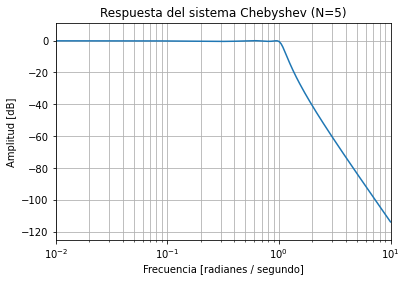

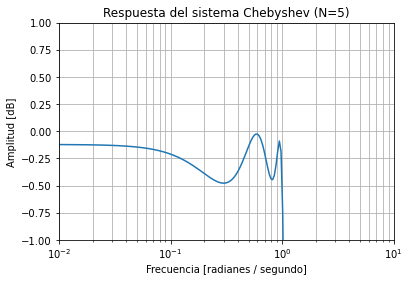

In [8]:
import matplotlib.pyplot as plt

#sys=signal.zpk2tf([],polost,0.2)
b,a=signal.zpk2tf([],polost,0.2)
w, h = signal.freqs(b, a)
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta del sistema Chebyshev (N=5)')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta del sistema Chebyshev (N=5)')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim(-1, 1)

plt.show()


## Implementación

Circuito (filtro de variable de estados)

<img src="./variabledeestaodos.png" align="center" width="400" /> 

Transferencia del filtro:

<img src="./bloque1.png" align="center" width="400" /> 

Donde ahora trabajamos los bloques:

Una realimentaicón positiva:

$$G_{equiv}=\frac{G}{1-GH}$$

$$G_{equiv}=\frac{-\frac{1}{SC_1R_1}}{1+\frac{1}{SC_1R_1} \cdot \frac{R_3}{(R_3+R_4)} \cdot (1+\frac{R_6}{R_5})} $$

$$G_{equiv}= -\frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5})} $$

<img src="./bloque2.png" align="center" width="400" /> 

$$ \frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5}) \cdot \frac{1}{SC_2R_2}} $$

Ahora incorporando la última realimentación que queda:

$$ G_{equiv}=\frac{\frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5}) \cdot \frac{1}{SC_2R_2}}}{1+\frac{(R_3+R_4)}{SC_1R_1(R_3+R_4)+R_3 (1+\frac{R_R}{R_5}) \cdot \frac{1}{SC_2R_2}}} $$

Resolviendo:

$$ G_{equiv}=\frac{R_3+R_4}{[SC_1R_1(R_3+R_4)+R_3(1+\frac{R_6}{R_5}]SC_2R_2+R_3+R_4} $$

$$ G_{equiv}=\frac{R_3+R_4}{S^2C_1C_2R_1R_2(R_3+R_4)+SC_2R_2R_3(1+\frac{R_6}{R_5})+R_3+R_4} $$

<img src="./bloque3.png" align="center" width="400" /> 

$$ \frac{V_o}{Vi}=\frac{R_4(1+\frac{R_6}{R_5})}{S^2C_1C_2R_1R_2(R_3+R_4)+SC_2R_2R_3(1+\frac{R_6}{R_5})+R_3+R_4} $$

$$ \frac{V_o}{Vi}=\frac{1}{C_1C_2R_1R_2(R_3+R_4)}\frac{R_4(1+\frac{R_6}{R_5})}{S^2+S\frac{R_3}{C_1R_1(R3+R4)}(1+\frac{R_6}{R_5})+\frac{1}{C_1C_2R_1R_2}} $$

$$ \frac{V_o}{Vi}=\frac{R_4(1+\frac{R_6}{R_5})}{(R_3+R_4)}\frac{\frac{1}{C_1C_2R_1R_2}}{S^2+S\frac{R_3}{C_1R_1(R3+R4)}(1+\frac{R_6}{R_5})+\frac{1}{C_1C_2R_1R_2}} $$

En donde:

$\omega_0^2=\frac{1}{C_1C_2R_1R_2} $

$ K=\frac{R_4(1+\frac{R_6}{R_5})}{(R_3+R_4)} $

$ \frac{\omega_0}{Q}=\frac{R_3(1+\frac{R_6}{R_5})}{C_1R_1(R3+R4)} $

Por lo tanto:

$ Q=\sqrt{\frac{C_1R_1}{C_2R_2}}\frac{R_3+R_4}{R_3(1+\frac{R6}{R5})} $

Si $R_5=R_6$

$\omega_0^2=\frac{1}{C_1C_2R_1R_2} $

$ K=\frac{2R_4}{(R_3+R_4)} $

$ Q=\sqrt{\frac{C_1R_1}{C_2R_2}}\frac{R_3+R_4}{2R_3} $

Ahora tomando secciones de a dos:


In [9]:
Seccion1=np.convolve([1, p1],[1, p2])
Seccion2=np.convolve([1, p3],[1, p4])
Q1=-np.sqrt(Seccion1[2])/Seccion1[1]
Q2=-np.sqrt(Seccion2[2])/Seccion2[1]
print("Q de la etapa 1:",Q1.real)
print("Q de la etapa 2:",Q2.real)
print("Wo de la etapa 1:",np.sqrt(Seccion1[2].real))
print("Wo de la etapa 2:",np.sqrt(Seccion2[2].real))




Q de la etapa 1: 1.1324832052607716
Q de la etapa 2: 4.2793106921559225
Wo de la etapa 1: 0.7021395872616784
Wo de la etapa 2: 1.0270345661174214


Si $C_1=C_2=C$ y $R_1=R_2=R$

$\omega_0=\frac{1}{RC} $

$ Q=\frac{R_3+R_4}{2_R3}$

Si $R_3=1$

$ Q=\frac{1+R_4}{2}$

Defino que C=1

por lo tanto:
Para la primer atapa de 2do orden:

$R=1,42 $

$R_4=2Q-1$

$R_4=1,26

Para la segunda etapa:

con el mismo análisis

$R=0,98 $

$R_4=2Q-1$

$R_4=7,56

Para la etapa de primer Orden:
 
El polo está ubicado en: 

$\sigma=-0,39$

Por lo que: 

Si utilizamos un RC y dejamos que C=1:

$R=2,56 $


Circuito normalizado

<img src="./chebynorm.png" align="center" width="600" /> 


Si desnormalizamos los capacitores para la frecuencia de trabajo=3.2KHz pero para que sus valores sean de 100nf despejamos la norma de R

Los capacitores ahora valen:

$47nf=\frac{1}{2\pi3,2KHz \cdot RN}$

$RN=\frac{1}{2\pi3,2KHz \cdot  47nf}=1058,21\Omega$

<img src="./chebydesnorm.png" align="center" width="600" /> 
<img src="./chebysimu.png" align="center" width="600" /> 



Ahora para hacerlo con Maxima Planicidad:


In [10]:
ripple_ej4 = 0.4 # dB \alpha_{max} 
attenuation_ej4 = 48 # dB \alpha_{min} 
ws_ej4= 3

eps_ej4 = np.sqrt(np.subtract(np.power(10,np.divide(ripple_ej4,10)),1)).round(2)
order_ej4 =  np.divide(np.log10(np.divide(np.subtract(np.power(10,np.divide(attenuation_ej4,10)),1),np.power(eps_ej4,2))),(np.multiply(2,np.log10(ws_ej4))))
order_ej4=np.ceil(order_ej4)
eps_ej4=np.round(eps_ej4,2)
print(eps_ej4)
print(order_ej4)

0.31
7.0


ReNormalizamos con $\omega_b=0.31^{\frac{-1}{N}}$

Ubicación de los polos:

180/7º=25.71º

Tenemos 3 pares de polos complejos conjugados
y un polo simple sobre el eje $\sigma$

Los polinomios de Maxima planicidad de orden dos son


$\frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$

en donde:

$ Q=2*cos\psi_n $

Siendo 

$\psi_1=25,71º $

$\psi_2=51,42º $

$\psi_3=77,13º $

Polos:

$P_n=-cos(\psi_n)+jsen(\psi_n) $ 

$P1=-0,9+j0.43$

$P_2=-0,9-j0.43$

$P_3=-0,62+j0.78$

$P_4=-0,62-j0.78$

$P_5=-0,22+j0.97$

$P_6=-0,22-j0.97$

$P_7=-1+j0$

Como todas las singularidades se encuentran en una circunferencia de radio unitario por estar normalizado, $\omega_0=1 $ para todas ellas

$$ T(s)=\frac{1}{s^2+s2cos(\psi_1)+1} \cdot \frac{1}{s^2+s2cos(\psi_2)+1} \frac{1}{s^2+scos(\psi_3)+1} \cdot \frac{1}{s+1} $$


$$ T(s)=\frac{1}{s^2+1.81s+1} \cdot \frac{1}{s^2+1.25s+1} \frac{1}{s^2+0.44s+1} \cdot \frac{1}{s+1} $$



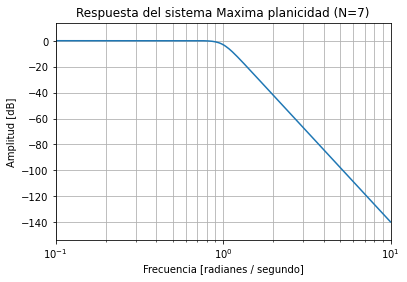

In [11]:
polos=[complex(-0.9,0.43),complex(-0.9,-0.43),complex(-0.62,0.78),complex(-0.62,-0.78),complex(-0.22,0.97),complex(-0.22,-0.97),complex(-1,0)]
b,a=signal.zpk2tf([],polos,1)
w, h = signal.freqs(b, a)
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta del sistema Maxima planicidad (N=7)')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

Tomamos las mismas ecuaciones de diseño:

Como todas tiene la mismas frecuencia R=1 y C=1

$ Q=\frac{1+R_4}{2}$

Para la primer atapa de 2do orden:

$R_4=2Q-1$

$R_4=0.1$

Para la segunda etapa:

$R_4=0.6$

Para la tercer etapa:

$R_4=3.54$

Para la etapa de primer Orden:
 
El polo está ubicado en: 

$\sigma=-1$

Por lo que: 

Si utilizamos un RC y dejamos que R=1 y C=1:


Circuito normalizado

<img src="./Butter7ordcir.png" align="center" width="800" /> 


Si desnormalizamos los capacitores para la frecuencia de trabajo=3.2KHz pero para que sus valores sean de 100nf despejamos la norma de R

Los capacitores ahora valen:

$47nf=\frac{1}{2\pi3,2KHz \omega_b \cdot RN}$

$RN=\frac{1}{2\pi3,2KHz \omega_b \cdot  47nf}=895,17\Omega$

<img src="./Butter7ordcirdesnorm.png" align="center" width="800" /> 

<img src="./Butter7ordcirdesnormsimu.png" align="center" width="800" /> 


La ventaja de utilizar Butterworth es que el diseño es más simple ya que todas las etapas trabajan a la misma frecuencia y podemos hace que sea la normalizada 1rad/seg
La ventaja de utilizar Chebychev es que tenemos un filtro de menor orden,lo que significa un circuito más chico, con menos componentes a expesas de tener ripple en la banda de paso



### Ejercicio 5

Realización de un filtro pasa alto:

* $\alpha_{max}=1$
* $\alpha_{min}=35$
* $f_p=3500$
* $f_s=1000$

Realizando una transformación de frecuencia en donde $\Omega=1/S$ y normalizando en 3,5KHz:
* $\alpha_{max}=1$
* $\alpha_{min}=35$
* $f_p=1$
* $f_s=3,5$

Diseño maxima planicidad:


In [12]:
ripple = 3 # dB \alpha_{max} 
attenuation = 30 # dB \alpha_{min} 
ws= 4

eps = np.sqrt(np.subtract(np.power(10,np.divide(ripple,10)),1)).round(2)
order =  np.divide(np.log10(np.divide(np.subtract(np.power(10,np.divide(attenuation,10)),1),np.power(eps,2))),(np.multiply(2,np.log10(ws))))
order=np.ceil(order)
print("Epislon:",eps.round(2))
print("Orden:",order)

Epislon: 1.0
Orden: 3.0


ReNormalizamos con $\omega_b=0.51^{\frac{-1}{4}} $

Ubicación de los polos:

180º/4=45º

Tenemos 2 pares de polos complejos conjugados

Los polinomios de Maxima planicidad de orden dos son

$\frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}$

en donde:

$ Q=2*cos\psi_n $

Siendo 

$\psi_1=22,5º $

$\psi_2=67,5º $

Polos:

$P_n=-cos(\psi_n)+jsen(\psi_n) $ 

$P_1=-0,92+j0.38$

$P_2=-0,92-j0.38$

$P_3=-0,38+j0.92$

$P_4=-0,38-0.92$


Como todas las singularidades se encuentran en una circunferencia de radio unitario por estar normalizado, $\omega_0=1 $ para todas ellas

$$ T(\Omega)=\frac{1}{\Omega^2+\Omega2cos(\psi_1)+1} \cdot \frac{1}{\Omega^2+\Omega2cos(\psi_2)+1} $$


$$ T(\Omega)=\frac{1}{\Omega^2+1.84\Omega+1} \cdot \frac{1}{\Omega^2+0.76\Omega+1} $$

Que son los mismos polos que encontramos en el ej3.3

Transformando en frecuencia cada transferencia en donde $ S=\frac{1}{\Omega} $

$$ T(s)=\frac{1}{\frac{1}{s}^2+1.84\frac{1}{s}+1} \cdot \frac{1}{\frac{1}{s}^2+0.76\frac{1}{s}+1} $$

$$ T(s)=\frac{s^2}{s^2+1.84s+1} \cdot \frac{s^2}{s^2+0.76s+1} $$

Si utilizamos un circuito RLC serie saliendo por la tensión en el inductor su transferencia es:

$$ T(s)=\frac{s^2}{s^2+s\frac{R}{L}+\frac{1}{LC}}$$

$\omega_0^2=\frac{1}{LC} $

$Q=\sqrt{\frac{L}{C}} \cdot \frac{1}{R} $


Si L=C=1

$Q=\frac{1}{R}$

Etapa1:

R=1.84

Etapa2:

R=0.76

Circuito y simulación normalizada


<img src="./5norm.png" align="center" width="600" /> 

<img src="./5normsimu.png" align="center" width="600" /> 

Desnormalizando utilizando $RN=1K\Omega$

$R'=RN \cdot R$

Primera etapa:

$R'=1.84K\Omega$

Segunda etapa:

$R'=760\Omega$

Capacitores e inductores 

$C'=\frac{C}{\omega_b\cdot 2\pi  3,5KHz \cdot RN}$
$L'=\frac{L\cdot RN}{\omega_b\cdot 2\pi 3,5KHz}$

$\omega_b=\epsilon^{-1/4}=1.18$

Para ambas etapas:

C'=38,42nf

L'=38,5mH

<img src="./5desnorm.png" align="center" width="600" /> 

<img src="./5desnormsimu.png" align="center" width="600" /> 


Si ahora activamos las inductancias con el circuito de Antoniu y colocando el capacitor en la segunda impedancia y siendo los demas resistores de 1K$\Omega$

$L=10^6C $

$C=\frac{L}{10^6} $

$C=38.5nf $

Circuito y simulacion:


<img src="./5activadocircuito.png" align="center" width="600" /> 

<img src="./5activadosimu.png" align="center" width="600" /> 

### Ejercicio 6

Realización de un filtro pasa alto:

alfa_max=0.4
alfa_min=48
fp=9600
fs=3200

Realizando una transformación de frecuencia en donde $\Omega=1/S$ y normalizando en 9,6KHz:

alfa_max=0.4
alfa_min=48
fp=1
fs=3

Para obtener el filtro de menor orden usamos Chebyshev:

In [19]:
alfa_min=30 # en dB
alfa_max=3 # en dB
wp=1
ws=4
epsilon=np.sqrt(10**(alfa_max/10)-1)
N=np.arccosh(np.sqrt((10**(alfa_min/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon)
print("Orden:",N)

Episilon: 0.9976283451109834
Orden: 3.0


Dado que es el mismo orden y epsilon que el ej 4. La ubicación de los polos es la misma y la transferencia también.

In [15]:
denn=[-24.6016, 0, -61.5040,0,-53.816,0,-19.22,0,-2.4025,0,1]
polos=np.roots(denn)
polost=[]
for polo in polos:
    if (polo.real < 0):
        polost.append(polo.round(2))
print(polost)        


[(-0.12+1.02j), (-0.12-1.02j), (-0.31+0.63j), (-0.31-0.63j), (-0.39+0j)]


Recordando teniamos:

Q de la etapa 1: 1.13
Q de la etapa 2: 4.27
Wo de la etapa 1: 0.70
Wo de la etapa 2: 1.02

Si utilizamos un circuito RLC serie saliendo por la tensión en el inductor su transferencia es:

$$ T(s)=\frac{s^2}{s^2+s\frac{R}{L}+\frac{1}{LC}}$$

Como ahora $\omega_0 $ no es 1. Al transformar tenemos que en cada etapa referida a la etapa pasabajo

$$ T(s)=\frac{s^2}{s^2+s\frac{1}{Q\omega_0}+\frac{1}{\omega_0^2}}$$

Comparando:

Si C=1

Para la primer etapa:

$L=\frac{\omega_0^2} =2.02 $

$R=L \frac{1}{\omega_0Q}=0.62$

Para la segunda etapa:

$L=\frac{\omega_0^2} =1.04

$R=L \frac{1}{\omega_0Q}=0.24$

La tercer etapa de primer orden es identica a la utilizada en el ejercicio 4, intercambiando R por C  pero con los mismos valores

El polo está ubicado en: 

$\sigma=-0,39$

Por lo que: 

Si utilizamos un RC y dejamos que C=1:7.53


$R=2,56 $

<img src="./6norm.png" align="center" width="600" /> 
<img src="./6normsimu.png" align="center" width="600" /> 

Desnormalizando para resistores de 2.2K$\Omega$ y frec =9,6KHz

Primer etapa:

$R'=R RN=1364\Omega$

$C'=\frac{C}{RN 2\pi 9,6KHz}=7.53nf$

L'=\frac{L RN}{2\pi 9,6KHz}=17.8mH$

Para la segunda:

$R'=R RN=528\Omega$

$C'=\frac{C}{RN 2\pi 9,6KHz}=7.53nf$

L'=\frac{L RN}{2\pi 9,6KHz}=38mH$

Para la etapa de primer orden:

$R'=R \cdot RN=5632\Omega$

$C'=\frac{C}{RN 2\pi 9,6KHz}=7.53nf$

<img src="./6desnorm.png" align="center" width="600" /> 

<img src="./6desnormsimu.png" align="center" width="600" /> 

Activando el circuito con OTA para reemplazar los inductores tenemos:


En donde $Leq=\frac{C}{gm_1 gm_2}$

Para la primer etapa:

si usamos el mismo C de 7,54nf

$gm_1=gm_2=650uS$


Para la segunda etapa:

si usamos el mismo C de 7,54nf

$gm_1=gm_2=445.15uS$

<img src="./6activado.png" align="center" width="600" /> 





#### Ejercicio 7

Diseñar un filtro pasabajos a partir de una estructura MFB sabiendo que debe proporcionar un retardo constante de 100 μs en la banda de paso, con un desvío del retardo máximo de 10% para la frecuencia de $\omega_1$=25k rad/s y un máximo de 1 dB de atenuación a la frecuencia de $\omega_2$ = 10k rad/s. 

Dadas las especificaciones sabemos que debemos diseñar un filtro con la aproximación de Bessel

Para eso tomamos la norma 1/100us = 10k

Dicho valor será nuestra norma, normalizando ahora las frecuencias $\omega_1$ y $\omega_2$ 

$\omega_1$=2.5
$\omega_2$ 1


De las tablas extramos que:


<img src="./besseltabla1.png" align="center" width="600" /> 

<img src="./besseltabla2.png" align="center" width="600" /> 

Para cumplir com ambas especificaciones adpotamos n=4


Para ello determinamos el polinomio de Bessel:

$$coth(s)=\frac{1}{s}+\frac{1}{\frac{3}{s}+\frac{1}{\frac{5}{s}+\frac{1}{\frac{7}{s}}}} $$

Reacomodando todo:

$$B_4(s)=s^4+10s^3+45s^2+105s+105$$

$$T(s)=\frac{B_4(0)}{B_4(s)}$$

$$T(s)=\frac{105}{s^4+10s^3+45s^2+105s+105}$$


Tomando las raices del polinomio:




In [16]:
den=[1,10,45,105,105]
np.roots(den).round(2)


array([-2.1+2.66j, -2.1-2.66j, -2.9+0.87j, -2.9-0.87j])

Tenemos entonces cuatro polos complejos conjugados dos etapas de 2do orden

Para cada etapa de segundo orden sabemos que:

Sabiendo que los polos estan en $P_{12}=\alpha_1±j\alpha_1$  $P_{34}=\alpha_2±j\alpha_2$

$$T(s)=\frac{1}{s^2-2s\alpha_1+(\alpha_1^2+\beta_1^2)} \cdot  \frac{1}{s^2-2s\alpha_2+(\alpha_2^2+\beta_2^2)}$$

Reemplazando:

$$T(s)=\frac{11,48}{s^2+4,2s+11,48} \cdot \frac{9,16}{s^2+5,8s+9,16} $$


Primer etapa:
$\omega_0=3,37$
$Q=\frac{3,37}{4,2}=0,8$

Segunda etapa:
$\omega_0=3$
$Q=\frac{3}{5,8}=0,51$



#### Implementación con estructura Multiple-feedback

<img src="./Multiple-Feedback.png" align="center" width="600" /> 

En donde las expresiones de diseño son:

$$\omega_0^2=\frac{1}{R_4C_5R_3C_2}$$

$$K=-\frac{R_4}{R_1} $$

$$Q=\frac{\sqrt{R_3R_4C_2C_5}}{(R_3+R_4+\frac{R_4R_3}{R1})C_5}$$

Como tenemos que K=1,$R_4=R_1=R_3=1\Omega$

Si reemplazamos $\omega_0^2$ en la expresion de Q tenemos

$$Q=\frac{1}{3\omega_0C_5}$$

Como $\omega_0^2=11,48$ 

Como $\omega_0=3,38$

$$Q=\frac{1}{3,38 (3)C_5}$$

$$Q=\frac{1}{10,14 C_5} $$

$$C_5=\frac{1}{8,11} $$

$$C_5=0,12$$

$C_2=\frac{1}{\omega_0^2 C_5}$

$C_2=\frac{1}{11,35 C_5}=0,73$

Para la segunda etapa:

Como $\omega_0^2=9$ 

Como $\omega_0=3$

$$Q=\frac{1}{9C_5} $$

$$C_5=\frac{1}{9 Q} $$

$$C_5=0,21$$

$C_2=\frac{1}{9 C_5}=0,51$

Valores de los capacitores:

Primer etapa:

$C_2=0,73F$

$C_5=0,12F$

Segunda etapa:

$C_2=0,51F$

$C_5=0,21F$

Vamos a desnormalizar el circuito.

Elevamos el valor de todos los resistores a 1K$\Omega$

y recordamos que nuestra $\omega_{norm}=10k \frac{rad}{seg}$

Capacitores:

$C'=\frac{C}{1K\omega_{norm}} $

<img src="./ej7cir.png" align="center" width="700" /> 

<img src="./ej7retardo.png" align="center" width="700" /> 

<img src="./ej7modulo.png" align="center" width="700" /> 



### Ejercicio 8

Se debe diseñar un filtro pasabanda con las siguientes especificaciones:
* Frecuencia de corte inferior 𝑓 : 1600 KHz 𝑐𝑖
* Frecuencia de corte superior 𝑓 : 2500 KHz 𝑐𝑠
* Ripple máximo en la banda de paso ε: 3dB
* Máxima planicidad en la banda de paso.
* Ganancia máxima en la banda de paso: 10 dB
* Atenuación mínima α de 20 dB a las frecuencias de 1250 KHz y 3200 KHz. 𝑚í𝑛

Se pide:

* a) Obtener la función transferencia normalizada del filtro
* b) Graficar el diagrama de polos y ceros
* c) Graficar la transferencia (módulo y fase) del filtro pedido
* d) Sintetizar el filtro utilizando estructuras Ackerberg-Mossberg (AM).
* e) Simular el filtro obtenido, verificando las especificaciones de diseño




Para comenzar obtenemos la frecuencia central del filtro:

$f_0=\sqrt{f_{cs} \cdot f_{ci}} =\sqrt{1,6MHz \cdot 2,5MHz} = 2 MHz $

Utilizamos este valor para normalizar las frecuencias:

$f_{ci}=\frac{1,6MHz}{2MHz} = 0,8$

$f_{ci}=\frac{2,5MHz}{2MHz} = 1,25$

Buscamos el ancho de banda de nuestro filtro normalizado como:

B=1,25-0,8=0,45

$Q=\frac{f_0}{B}=2,22 $


Resumiendo:

$f_{s1}=0,625 $
$f_{p1}=0,8 $
$f_0=1 $
$f_{p2}=1,25 $
$f_{s2}=1,6 $

$\alpha_{min}=20dB $

$\alpha_{max}=3dB $

Utilizando la transformación de pasa banda a pasa bajo:

$ K(\omega)=Q \cdot \frac{\omega^2-1}{\omega} $

$f_{s1}=-2,16 $
$f_{p1}=-1 $
$f_0=0 $
$f_{p2}=1 $
$f_{s2}=2,16 $


Diseñamos el pasa bajo para $f_p=1$ y $f_s=2,16$


Como por espeficifacion la atenuación en $f_p=3dB$ sabemos que $\epsilon=1$ filtro de Butterworth. Buscamos ahora el orden del filtro







In [20]:
ripple = 3 # dB \alpha_{max} 
attenuation = 20 # dB \alpha_{min} 
ws= 2.16

eps = 1
order =  np.divide(np.log10(np.divide(np.subtract(np.power(10,np.divide(attenuation,10)),1),np.power(eps,2))),(np.multiply(2,np.log10(ws))))
order=np.ceil(order)
print("Orden:",order)

Orden: 3.0


Polos separados:

$\frac{180º}{3}=60º$

$$T(s)=\frac{1}{s^2+s 2cos(60º)+1} \cdot \frac{1}{s+1} $$

$$T(s)=\frac{1}{s^2+s+1} \cdot \frac{1}{s+1} $$

Acomodando todo:

$$ T(s)=\frac{1}{s^3+2s^2+2s+1} $$

Ahora aplicando la transformación inversa para llevarlo al pasabanda:

$$ s=Q\frac{S^2+1}{S} $$


$$T(s)=\frac{1}{{Q^2(\frac{S^2+1}{S})}^2+{Q\frac{S^2+1}{S}}+1} \cdot \frac{1}{{Q\frac{S^2+1}{S}}+1} $$

$$T(s)=\frac{1}{{Q^2(\frac{S^4+2S^2+1}{S^2})}+{Q\frac{S^2+1}{S}}+1} \cdot \frac{1}{{Q\frac{S^2+1}{S}}+1} $$

$$T(s)=\frac{1S^2}{{Q^2(S^4+2S^2+1)}+S{Q (S^2+1)}+S^2} \cdot \frac{S}{Q(S^2+1)+S} $$

$$T(s)=\frac{S^2}{Q^2S^4+2Q^2S^2+Q^2+S(QS^2+Q)+S^2} \cdot \frac{S}{QS^2+Q+S} $$

$$T(s)=\frac{S^2}{Q^2S^4+2Q^2S^2+Q^2+QS^3+QS+S^2} \cdot \frac{\frac{S}{Q}}{S^2+1+\frac{S}{Q}} $$

$$T(s)=\frac{S^2}{Q^2S^4+QS^3+2Q^2S^2+S^2+QS+Q^2}  \cdot \frac{\frac{S}{Q}}{S^2+\frac{S}{Q}+1} $$

$$T(s)=\frac{\frac{S^2}{Q^2}}{S^4+\frac{S^3}{Q}+S^2(2+\frac{1}{Q^2})+\frac{1}{Q}S+1}  \cdot \frac{\frac{S}{Q}}{S^2+\frac{S}{Q}+1} $$

Reemplazando que Q=2,2

$$T(s)=\frac{0,20 S^2}{S^4+0,45S^3+2,2S^2+0,45S+1}  \cdot \frac{0,45S}{S^2+0,45S+1} $$


Vamos a verificar todo:
Continuamos con metodos computacionales...




In [12]:
np.roots([1,0.45,2.2,0.45,1]).round(2)

array([-0.13+1.21j, -0.13-1.21j, -0.09+0.82j, -0.09-0.82j])

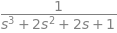

In [42]:
from sympy import *
from sympy.solvers import solve
import numpy as np
from sympy import init_printing
init_printing() 

s=Symbol('s') 

Tpb=(1)/(s**2+s+1) * (1/(s+1))
Tpb=expand(Tpb)
Tpb

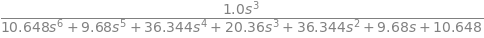

In [43]:
Q=2.2
monico=false
# si no me interesa monico
if monico==true:
    z=((s**2+1)/s)  #agrego el Q a mano en cada expresión para que me quede mónico
    Tpband=(1/Q**2)/(z**2+z/Q+1/Q**2) * (1/Q/(z+1/Q))
else:
    z=(Q*(s**2+1)/s)
    Tpband=(1)/(z**2+z+1) * (1/(z+1))
    
Tpband=cancel(Tpband)
Tpband

In [44]:
polos=np.roots([10.6448,9.68,36.344,20.36,36.344,9.68,10.648])
polos.round(2)


array([-0.14+1.21j, -0.14-1.21j, -0.23+0.97j, -0.23-0.97j, -0.09+0.82j,
       -0.09-0.82j])

In [45]:
den_2sos=[]
polos_simply=[]
polos_simply.append(polos[0])
for i in range(1,len(polos)):
    if((polos[i].real!=polos[i-1].real) or (polos[i].imag!=-polos[i-1].imag)):
        polos_simply.append(polos[i])
for polo in polos_simply:
    if(polo.imag!=0):
        den_2sos.append([1, -2*(polo.real.round(3)), (polo.real**2+polo.imag**2).round(3)])
    else:
        den_2sos.append([1, -polo.real])
print(den_2sos)

[[1, 0.272, 1.484], [1, 0.454, 0.999], [1, 0.184, 0.675]]


$$T(s)=\frac{s^3}{10.648s^6+9.68s^5+36.344s^4+20.36s^3+36.344s^2+9.68s+10.648}$$

Transformadas en tres SOS:

$$T(s)=4,13 \cdot \frac{0,272s}{s^2+0,272s+1,484} \cdot \frac{0,454s}{s^2+0,454s+1} \cdot \frac{0,184s}{s^2+0,184s+0,675} $$

El valor de 4,13 sale de realizar $\frac{1}{10,648\cdot (0,272\cdot0,454\cdot0,184)} =4,13$



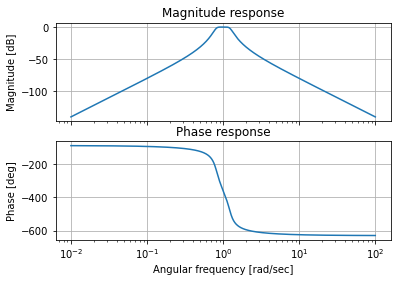

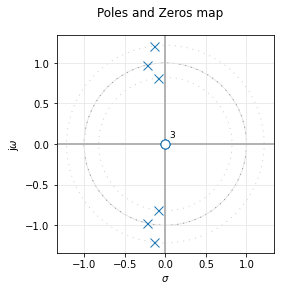

In [11]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[1,0,0,0]
den=[10.648,9.68,36.344,20.36,36.344,9.68,10.648]

all_sys=(sig.TransferFunction(num,den))
filter_names=("Filtro Pasabanda de 6to Orden Butterworth")

fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())



$$T(s)=4,13 \cdot \frac{0,272s}{s^2+0,272s+1,484} \cdot \frac{0,454s}{s^2+0,454s+1} \cdot \frac{0,184s}{s^2+0,184s+0,675} $$

Vamos a sintetizar el filtro con tres estructuras Ackerberg-Mosberg.

Estructura a utilizar:

<img src="./acker.png" align="center" width="700" /> 

Definimos los parametros para cada etapa:

Primera etapa

$\omega_0=1,21$

$Q=4,44$

$\omega_0=1$

$Q=2,2$

$\omega_0=0,82$

$Q=4,44$

Repartimos el K en las tres etapas $\sqrt[3]{4,13}=1,6=K$

<img src="./Ackernorm.png" align="center" width="700" /> 

<img src="./simu1.png" align="center" width="700" /> 

Desnormalizamos para 2MHz y R=1K


<img src="./ackerdesnorm.png" align="center" width="700" /> 

<img src="./simu2.png" align="center" width="700" /> 

<img src="./simu3.png" align="center" width="700" />


### Ejercicio 9

Idem 8 pero con Chebyshev y ripple de 1dB en la banda de paso


In [12]:
alfa_min=20 # en dB
alfa_max=1 # en dB
wp=1
ws=2.16
epsilon=np.sqrt(10**(alfa_max/10)-1)
N=np.arccosh(np.sqrt((10**(alfa_min/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon.round(2))
print("Orden:",N)

Episilon: 0.51
Orden: 3.0


Sabiendo que nuestro filtro es de tercer orden obtenemos los polinomios:
        
$$ C_n(𝜔)=2𝜔 C_{n-1}(𝜔)-C_{n-2}(𝜔)$$

$$ C_0(𝜔)=1 $$
$$ C_1(𝜔)= 𝜔 $$
$$ C_2(𝜔)=2𝜔^2-1 $$
$$ C_3(𝜔)=2𝜔 (2𝜔^2-1)-𝜔 =4𝜔^3-3𝜔 $$

Armando el demonimador:

$Den(j𝜔)^2=1+𝜖^2 \cdot C_3^2(𝜔) $

$Den(j𝜔)^2=1+𝜖^2 \cdot (4𝜔^3−3𝜔)^2$

$𝜔^3=\frac{s^3}{j^3}=\frac{s^3}{-j} $

$𝜔=\frac{s}{j} $

$Den(s)^2=1+𝜖^2 \cdot (\frac{-4s^3}{j}-\frac{3s}{j})^2 $

$Den(s)^2=1+𝜖^2 \cdot \frac{1}{j^2}(-4s^3-3s)^2 $

$Den(s)^2=1-𝜖^2 \cdot (-4s^3-3s)^2 $

$Den(s)^2=1-𝜖^2 \cdot (16s^6+24s^4+9s^2) $

Expandimos todo y obtenemos los polos y nos quedamos con aquellos que tienen parte real negativa:

In [13]:
from sympy import *
from sympy.solvers import solve
import numpy as np
from sympy import init_printing
init_printing() 

epsilon=0.51
s=Symbol('s') 
cn=(-4*s**3-3*s)**2 
den=1-(epsilon**2)*expand(cn)
den=poly(den)
den=tuple(den.all_coeffs())
polos=np.roots(den).round(2)
polost=[]
for polo in polos:
    if (polo.real < 0):
        if(polo.imag==0):
            polost.append(polo.real)
        else:polost.append(polo)
print(polost)  

[(-0.25+0.97j), (-0.25-0.97j), -0.49]


Armamos el nominador sabiendo que la sección de segundo orden cuyo polo es $\alpha±j\beta$

$$T_{sos}(s)=\frac{\alpha^2+\beta^2}{s^2-2\alpha s+\alpha^2+\beta^2}$$

In [14]:
den_2sos=[]
polos_simply=[]
polos_simply.append(polost[0])
for i in range(1,len(polost)):
    if((polost[i].real!=polost[i-1].real) or (polost[i].imag!=-polost[i-1].imag)):
        polos_simply.append(polost[i])
for polo in polos_simply:
    if(polo.imag!=0):
        den_2sos.append([1, -2*(polo.real).round(2), (polo.real**2+polo.imag**2).round(2)])
    else:
        den_2sos.append([1, -polo.real])
print(den_2sos)
    

[[1, 0.5, 1.0], [1, 0.49]]


$$T(s)=\frac{1}{s^2+0,5s+1} \cdot \frac{0.5}{s+0.5} $$

Para pasarlo a pasabanda aplicamos el nucleo de transformación en donde:

$$s=Q\frac{S^2+1}{S}$$

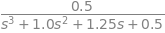

In [15]:
#T(s)=\frac{1,2}{s^2+0,68s+1,2} \cdot \frac{0,67}{s+0,67} $$
Tpb=(1)/(s**2+0.5*s+1) * ((0.5)/(s+0.5))
Tpb=expand(Tpb)
Tpb

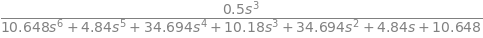

In [16]:
Q=2.2
monico=true
# si no me interesa monico
if monico==false:
    z=((s**2+1)/s)  #agrego el Q a mano en cada expresión para que me quede mónico
    Tpband=(1/Q**2)/(z**2+0.5*z/Q+1/Q**2) * ((0.5/Q)/(z+0.5/Q))
else:
    z=(Q*(s**2+1)/s)
    Tpband=(1)/(z**2+0.5*z+1) * ((0.5)/(z+0.5))
    
Tpband=cancel(Tpband)
Tpband

In [17]:
polos=np.roots([10.648,4.84,34.694,10.18,34.694,4.84,10.648])
polos

array([-0.06904716+1.24247742j, -0.06904716-1.24247742j,
       -0.11363636+0.99352241j, -0.11363636-0.99352241j,
       -0.0445892 +0.80236568j, -0.0445892 -0.80236568j])

In [18]:
den_2sos=[]
polos_simply=[]
polos_simply.append(polos[0])
for i in range(1,len(polos)):
    if((polos[i].real!=polos[i-1].real) or (polos[i].imag!=-polos[i-1].imag)):
        polos_simply.append(polos[i])
for polo in polos_simply:
    if(polo.imag!=0):
        den_2sos.append([1, -2*(polo.real).round(3), (polo.real**2+polo.imag**2).round(3)])
    else:
        den_2sos.append([1, -polo.real])
print(den_2sos)

[[1, 0.138, 1.549], [1, 0.228, 1.0], [1, 0.09, 0.646]]


In [19]:
w01=np.sqrt(den_2sos[0][2])
w02=np.sqrt(den_2sos[2][2])
w03=np.sqrt(den_2sos[1][2])
Q1=w01/den_2sos[0][1]
Q2=w02/den_2sos[2][1]
Q3=w03/den_2sos[1][1]
print("w01:",w01.round(3))
print("Q1:",Q1.round(3))
print("w02:",w02.round(3))
print("Q2:",Q2.round(3))
print("w03:",w03.round(3))
print("Q3:",Q3.round(3))

w01: 1.245
Q1: 9.019
w02: 0.804
Q2: 8.93
w03: 1.0
Q3: 4.386


$$T(s)= \frac{0.138S}{S^2+0.138S+1.549} \cdot \frac{0.228S}{S^2+0.228S+1} \cdot \frac{0.09S}{S^2+0.09S+0.646} $$

De la relacíón de ganancia de la transferencia completa a las 3 SOS 0.138 x 0.228 x 0.09=0,002831


$\frac{0.5}{0,002831 x 10,648 }=16,28$ Veces falta amplificar


$$T(s)=16,28 \cdot \frac{0.138S}{S^2+0.138S+1.549} \cdot \frac{0.228S}{S^2+0.228S+1} \cdot \frac{0.09S}{S^2+0.09S+0.646} $$

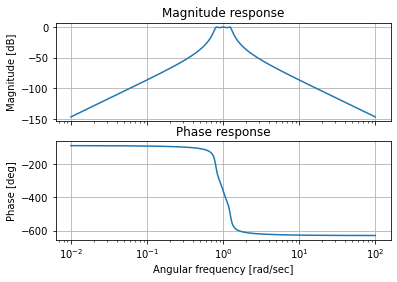

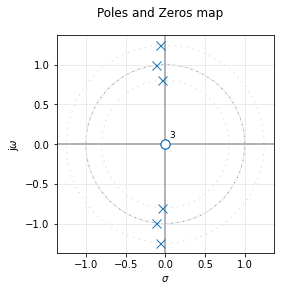

In [20]:
import scipy.signal as sig
import matplotlib as mpl
from splane import *

num=[0.5,0,0,0]
den=[10.648,4.84,34.694,10.18,34.694,4.84,10.648]

all_sys=(sig.TransferFunction(num,den))


fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, filter_names, 3, ())

Implementacion con estructura Ackerberg-Mossber

* K=$\sqrt[3]{16,28}=2,53$
* w01: 1.245
* Q1: 9.019
* w02: 0.804
* Q2: 8.93
* w03: 1.0
* Q3: 4.386

<img src="./ej10norm.png" align="center" width="700" /> 

<img src="./ej10simunorm.png" align="center" width="700" /> 

Llevando todo a 2MHz y 1K$\Omega$

<img src="./ej10desnorm.png" align="center" width="700" /> 

<img src="./ej10simudesnorm.png" align="center" width="700" /> 



## Ejercicio 10
Un tono de 45 KHz y 200 mV de amplitud es distorsionado por un tono de 12 KHz y 2 V de amplitud. Diseñar un filtro pasa altos que atenúe la señal interferente, de tal forma que el remanente no sea mayor que el 2% de los 200 mV.

La ganancia en alta frecuencia deberá ser de 0 dB y la máxima atenuación en la banda de paso menor a 1 dB. Emplear la aproximación que necesite menor número de etapas.

Sintetizar el filtro utilizando la siguiente estructura. Considere a A1 y a A2 como dos OTAs ideales
cuyos parámetros son $gm_1$ y $gm_2$.

Frecuencia de normalización para el Pasa Alto= 45KHz

Debe quedar menos que el 2% de 200mv=4mv 

Atenuación=$\frac{2}{4mv}$=500 Veces=54dB

Plantilla del pasa alto:

* $\alpha_{max}=1dB$
* $\alpha_{min}=54dB$
* $f_p=1$ 
* $f_s=0,26$ 

Pasando al pasa bajo

* $\alpha_{max}=1dB$
* $\alpha_{min}=54dB$
* $f_p=1$ 
* $f_s=3,84$ 

Veamos el oredn del filtro:

Comparando Maxima Planicidad y Cheby


In [21]:
ripple = 1 # dB \alpha_{max} 
attenuation = 54 # dB \alpha_{min} 
ws= 3.84

eps = np.sqrt(np.subtract(np.power(10,np.divide(ripple,10)),1)).round(2)
order =  np.divide(np.log10(np.divide(np.subtract(np.power(10,np.divide(attenuation,10)),1),np.power(eps,2))),(np.multiply(2,np.log10(ws))))
order=np.ceil(order)
print("Epsilon:",eps)
print("Orden:",order)

Epsilon: 0.51
Orden: 6.0


In [22]:
epsilon=np.sqrt(10**(ripple/10)-1)
N=np.arccosh(np.sqrt((10**(attenuation/10)-1)/epsilon**2))/np.arccosh(ws)
N=np.ceil(N)
print("Episilon:",epsilon.round(2))
print("Orden:",N)

Episilon: 0.51
Orden: 4.0


Utilizamos Cheby dado que pide realizar con la aproximación qu erequiera la menor cantidad de etapas

$$ C_n(\omega)=2\omega C_{n-1}(\omega)-C_{n-2}(\omega)$$

$$ C_0(\omega)=1 $$
$$ C_1(\omega)= \omega $$
$$ C_2(\omega)=2\omega^2-1 $$
$$ C_3(\omega)=2\omega (2\omega^2-1)-\omega =4\omega^3-3\omega $$
$$ C_4(\omega)= 2\omega (4\omega^3-3\omega )-(2\omega^2-1)=8\omega^4-8\omega^2+1$$

Armando el demonimador:

$Den(j\omega)^2=1+\epsilon^2 \cdot C_4^2(\omega) $

$Den(j\omega)^2=1+\epsilon^2 \cdot (8\omega^4-8\omega^2+1)^2$

$\frac{s}{j}=\omega $

$\omega^4=\frac{s^4}{j^4}=\frac{s^4}{j^2 j^2}=s^4 $

$\omega^2=\frac{s^2}{j^2}=-s^2 $

$Den(s)^2=1+\epsilon^2 \cdot {(8s^4+8s^2+1)}^2  $

$$ (a+b+c)^2=a^2+b^2+c^2+2ab+2ac+2bc $$

$Den(s)^2=1+\epsilon^2 \cdot (64s^8+64s^4+1+128s^6+16s^4+16s^2) $

$Den(s)^2=1+\epsilon^2 \cdot (64s^8+128s^6+80s^4+16s^2+1) $

$\epsilon=0.51$

$Den(s)^2=1+16,64s^8+33,29s^6+20,808s^4+4,16s^2+0,26 $

$Den(s)^2=16,64s^8+33,29s^6+20,808s^4+4,16s^2+1,26 $


In [23]:
denn=[16.64,0,33.29,0,20.808,0,4.16,0,1.26]
polos=np.roots(denn)
polost=[]
for polo in polos:
    if (polo.real < 0):
        polost.append(polo.round(2))
print(polost) 

[(-0.14+0.98j), (-0.14-0.98j), (-0.34+0.41j), (-0.34-0.41j)]


Chequeamos con La función de SCIPY

In [24]:
from scipy import signal
N=4
alfa_max=1
z, p,k = signal.cheby1(N, alfa_max, 1, 'low', analog=True,output='zpk')
p=p.round(2)
print(p)

[-0.14+0.98j -0.34+0.41j -0.34-0.41j -0.14-0.98j]


$$ T(s)=\frac{1}{s^2+2\cdot0,14s+(0,14^2+0,98^2)} \cdot \frac{1}{s^2+2\cdot0,34s+(0,34^2+0,41^2)}$$

$$ T(s)=\frac{1}{s^2+0,28s+0,98} \cdot \frac{1}{s^2+0,68s+0,28}$$



Transformamos cada celda a pasa alto:

$$ T(s)=\frac{1,02\cdot s^2}{s^2+0,28s+1,02} \cdot \frac{3,57 \cdot s^2}{s^2+2,42s+3,57} $$


Primer etapa:

$\omega_o=0,99$

Q=3,53

Segunda etapa:

$\omega_o=1,89$

Q=0,78


### Implementación

Estructura a utilizar:

<img src="./ej10cir.png" align="center" width="400" /> 


$$(V_i-V_o)SC_2=(V_o-V_x)gm_2 $$

$$V_x=-V_o gm_1  \frac{1}{SC_1} $$

$$ SC_2V_i=V_o(gm_2+\frac{gm_1}{SC_1}+SC_2 $$

$$ \frac{V_i}{V_o}= \frac{SC_1gm_2+gm_1+S^2C_2C_1}{S^2C_2C_1}$$

$$ \frac{V_o}{V_i}= \frac{S^2C_2C_1}{SC_1gm_2+gm_1+S^2C_2C_1}$$

$$ \frac{V_o}{V_i}= \frac{S^2}{S^2+S\frac{gm_2}{C_2}+\frac{gm_1}{C_1C_2}}$$

de donde vemos que:

$$\omega_0 = sqrt{\frac{gm_1}{C_1C_2}}$$

$$Q=\sqrt{frac{gm_1}{gm_2C_1}} $$

Si $C_1=1 y C_2=1$

$$\omega_0 = sqrt{gm_1}$$

$$Q=\sqrt{frac{gm_1}{gm_2}} $$

Primer etapa:

$gm_1=1$

$gm_2=0,08$

Segunda etapa:

$\omega_o=1,89$

Q=0,78

$gm_1=3,57$

$gm_2=5,86$

A la salida colocamos un atenuador para obtener los 0dB pedidos, aenuando 3,64 veces

R2=2,64
R1=1

Desnormalizamos el valor de los capacitores con la norma de 45KHz y utilizamos un valor de impedancia para diviid rl as trasconductancias de los OTA entonces:

$C=\frac{1}{2\pi45KHz 1K}=3,53nf $

Si no quisieran cargar al siguiente circuito colocar un buffer adaptador


<img src="./ej10cirfinal.png" align="center" width="700" /> 

